In [25]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt 

shelter_intake = pd.read_csv('/Users/allison.forte/Downloads/Austin Animal Center Intakes.csv')
shelter_intake.rename(columns = {'DateTime':'DateTimeIntake', 'MonthYear':'MonthYearIntake'}, inplace = True)
shelter_outcome = pd.read_csv('/Users/allison.forte/Downloads/Austin_Animal_Center_Outcomes.csv')
shelter_outcome.rename(columns = {'DateTime':'DateTimeOutcome', 'MonthYear':'MonthYearOutcome'}, inplace = True)

In [26]:
shelter_merged = pd.merge(shelter_intake, shelter_outcome, on = ['Animal ID'])
shelter_merged.head()

,Animal ID,Name_x,DateTimeIntake,MonthYearIntake,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,DateTimeOutcome,MonthYearOutcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,01/08/2019 03:11:00 PM,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,07/05/2015 03:13:00 PM,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,04/21/2016 05:17:00 PM,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,10/21/2013 11:39:00 AM,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,07/02/2014 02:16:00 PM,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [208]:
shelter_merged[["Intake_Age_Number", "Intake_Age_Unit"]]  = shelter_merged['Age upon Intake'].str.split(" ", expand = True)
shelter_merged["Intake_Age_Number"] = pd.to_numeric(shelter_merged["Intake_Age_Number"])

shelter_merged[["Outcome_Age_Number", "Outcome_Age_Unit"]]  = shelter_merged['Age upon Outcome'].str.split(" ", expand = True)
shelter_merged["Outcome_Age_Number"] = pd.to_numeric(shelter_merged["Outcome_Age_Number"])

shelter_merged['Years_in_Shelter'] = shelter_merged['Outcome_Age_Number'] - shelter_merged['Intake_Age_Number']

shelter_merged.loc[shelter_merged['Sex upon Intake'] == 'Intact Male', 'Intake_sex_coding'] = '1'  
shelter_merged.loc[shelter_merged['Sex upon Intake'] == 'Neutered Male', 'Intake_sex_coding'] = '2' 
shelter_merged.loc[shelter_merged['Sex upon Intake'] == 'Intact Female', 'Intake_sex_coding'] = '3'  
shelter_merged.loc[shelter_merged['Sex upon Intake'] == 'Spayed Female', 'Intake_sex_coding'] = '4' 
shelter_merged['Intake_sex_coding'] = pd.to_numeric(shelter_merged['Intake_sex_coding'])

shelter_merged.loc[shelter_merged['Sex upon Outcome'] == 'Intact Male', 'Outcome_sex_coding'] = '1'  
shelter_merged.loc[shelter_merged['Sex upon Outcome'] == 'Neutered Male', 'Outcome_sex_coding'] = '2' 
shelter_merged.loc[shelter_merged['Sex upon Outcome'] == 'Intact Female', 'Outcome_sex_coding'] = '3'  
shelter_merged.loc[shelter_merged['Sex upon Outcome'] == 'Spayed Female', 'Outcome_sex_coding'] = '4' 
shelter_merged['Outcome_sex_coding'] = pd.to_numeric(shelter_merged['Outcome_sex_coding'])

Animal_count = shelter_merged['Animal Type_x'].value_counts()
Animals = ('Dog', 'Cat', 'Other', 'Bird', 'Livestock')

Outcome_count = shelter_merged['Outcome Type'].value_counts()
Outcomes = ('Adoption', 'Transfer', 'Return to Owner', 'Euthanasia', 'Rto-Adopt', 'Died', 'Disposal', 'Missing', 'Relocate')

Intake_count = shelter_merged['Intake Type'].value_counts()
Intakes = ('Stray', 'Owner Surrender', 'Public Assist', 'Wildlife', 'Abandoned', 'Euthanasia Request')

shelter_merged[["Intake_date", "Intake_time", "Intake_AMPM"]]  = shelter_merged['DateTimeIntake'].str.split(" ", expand = True)
shelter_merged["Intake_date"] = pd.to_datetime(shelter_merged["Intake_date"])

shelter_merged[["Outcome_date", "Outcome_time", "Outcome_AMPM"]]  = shelter_merged['DateTimeOutcome'].str.split(" ", expand = True)
shelter_merged["Outcome_date"] = pd.to_datetime(shelter_merged["Outcome_date"])

shelter_merged['Calculated_years_in_Shelter'] = shelter_merged['Outcome_date'] - shelter_merged['Intake_date']
shelter_merged['Calculated_years_in_Shelter'] = pd.to_numeric(shelter_merged['Calculated_years_in_Shelter'])


In [203]:
Intake_count

Stray                 109663
Owner Surrender        38226
Public Assist          12618
Wildlife                5120
Abandoned                481
Euthanasia Request       282
Name: Intake Type, dtype: int64

In [235]:
shelter_merged.describe(include='all')

/var/folders/nj/3lbsz0_s67186v8nxnkcdy48p4fdg7/T/ipykernel_91507/825174257.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  shelter_merged.describe(include='all')


,Animal ID,Name_x,DateTimeIntake,MonthYearIntake,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,Years_in_Shelter,Intake_sex_coding,Intake_date,Intake_time,Intake_AMPM,Outcome_date,Outcome_time,Outcome_AMPM,Calculated_years_in_Shelter,Outcome_sex_coding
count,166390,125666,166390,166390,166390,166390,166390,166390,166389,166390,...,166389.000000,155828.000000,166390,166390,166390,166390,166390,166390,1.663900e+05,155823.000000
unique,114207,20563,90662,90662,55097,6,11,5,5,52,...,NaN,NaN,2997,720,2,2837,720,2,NaN,NaN
top,A721033,Lil Bit,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,...,NaN,NaN,2019-05-20 00:00:00,11:01:00,PM,2017-08-19 00:00:00,12:00:00,PM,NaN,NaN
freq,1089,1103,74,74,34525,109663,147361,105800,48719,30493,...,NaN,NaN,160,752,120756,253,3717,136614,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2013-10-01 00:00:00,NaN,NaN,2013-10-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2022-01-16 00:00:00,NaN,NaN,2021-07-16 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.079152,2.327528,NaN,NaN,NaN,NaN,NaN,NaN,1.313929e+15,2.693235
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.504330,1.095355,NaN,NaN,NaN,NaN,NaN,NaN,2.277480e+16,1.075160
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-11.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-2.529792e+17,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.640000e+13,2.000000


Text(0.5, 1.0, 'Intake Age Distribution')

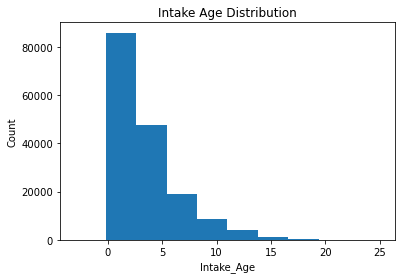

In [40]:
shelter_merged.Intake_Age_Number.hist(grid=False, bins=10)
plt.xlabel('Intake_Age')
plt.ylabel('Count')
plt.title('Intake Age Distribution')

Text(0.5, 1.0, 'Outcome Age Distribution')

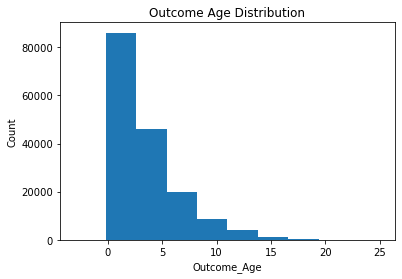

In [50]:
shelter_merged.Outcome_Age_Number.hist(grid=False, bins=10)
plt.xlabel('Outcome_Age')
plt.ylabel('Count')
plt.title('Outcome Age Distribution')

Text(0.5, 1.0, 'Years in Shelter')

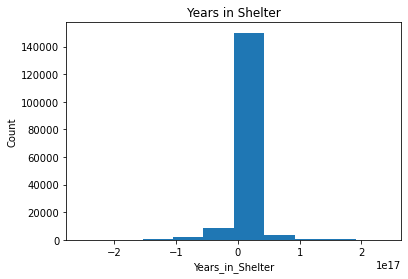

In [236]:
shelter_merged.Calculated_years_in_Shelter.hist(grid=False, bins=10)
plt.xlabel('Years_in_Shelter')
plt.ylabel('Count')
plt.title('Years in Shelter')

Text(0.5, 1.0, 'Sex at Intake')

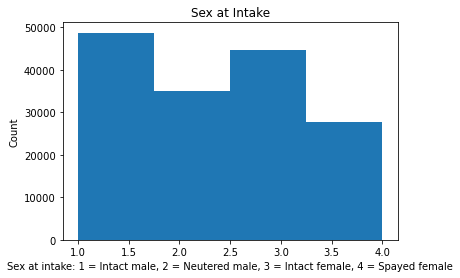

In [74]:
shelter_merged.Intake_sex_coding.hist(grid=False, bins=4)
plt.xlabel('Sex at intake: 1 = Intact male, 2 = Neutered male, 3 = Intact female, 4 = Spayed female')
plt.ylabel('Count')
plt.title('Sex at Intake')

Text(0.5, 1.0, 'Sex at Outcome')

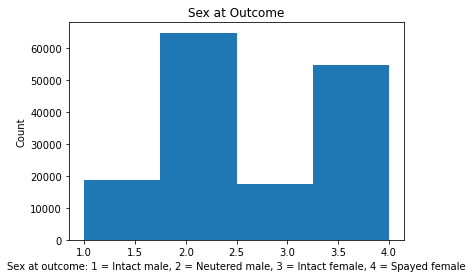

In [162]:
shelter_merged.Outcome_sex_coding.hist(grid=False, bins=4)
plt.xlabel('Sex at outcome: 1 = Intact male, 2 = Neutered male, 3 = Intact female, 4 = Spayed female')
plt.ylabel('Count')
plt.title('Sex at Outcome')

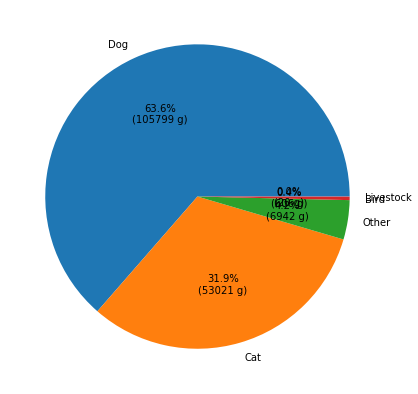

In [239]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


fig = plt.figure(figsize =(10, 7))
plt.pie(Animal_count, autopct = lambda pct: func(pct, Animal_count), labels = Animals)
 
# show plot
plt.show()

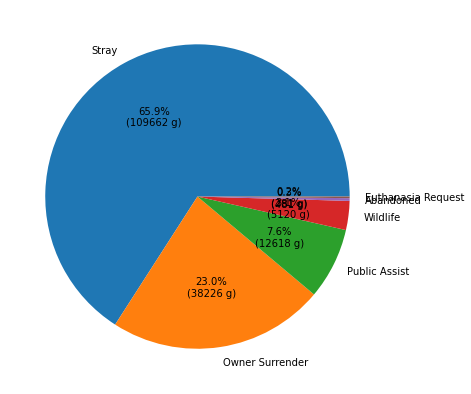

In [209]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Intake_count, autopct = lambda pct: func(pct, Intake_count), labels = Intakes)
 
# show plot
plt.show()

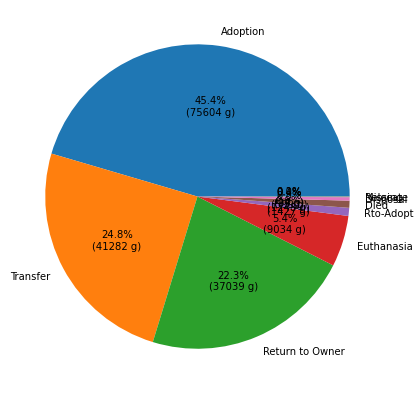

In [210]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Outcome_count, autopct = lambda pct: func(pct, Outcome_count), labels = Outcomes)
 
# show plot
plt.show()

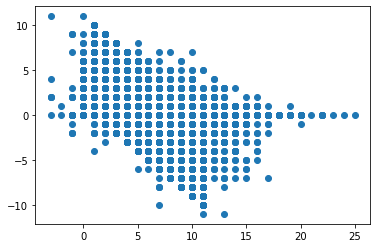

In [107]:
plt.scatter(shelter_merged['Intake_Age_Number'], shelter_merged['Years_in_Shelter'])
plt.show()

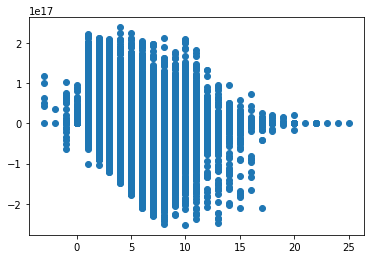

In [118]:
plt.scatter(shelter_merged['Intake_Age_Number'], shelter_merged['Calculated_years_in_Shelter'])
plt.show()

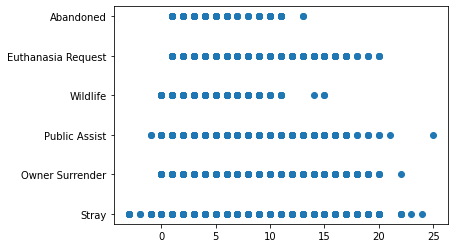

In [125]:
plt.scatter(shelter_merged['Intake_Age_Number'], shelter_merged['Intake Type'])
plt.show()

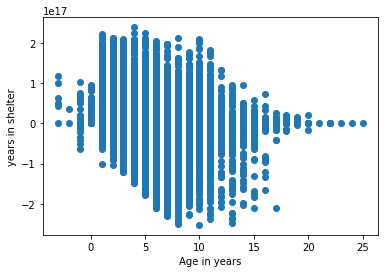

In [234]:
plt.scatter(shelter_merged['Intake_Age_Number'], shelter_merged['Calculated_years_in_Shelter'])
thinkplot.Config(xlabel='Age in years', ylabel='years in shelter')
plt.show()

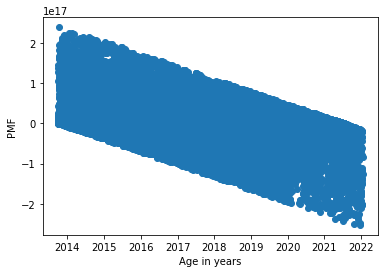

In [233]:
plt.scatter(shelter_merged['Intake_date'], shelter_merged['Calculated_years_in_Shelter'])
thinkplot.Config(xlabel='Intake date', ylabel='years')
plt.show()

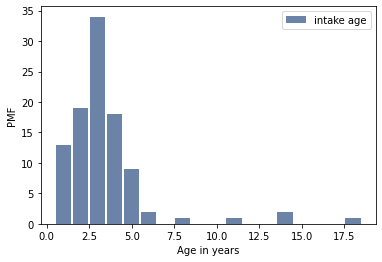

In [211]:
intake_age_hist1 = thinkstats2.Hist(shelter_merged['Intake_Age_Number'].head(100), label='intake age')
pmf = intake_age_hist1.Copy()
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Age in years', ylabel='PMF')


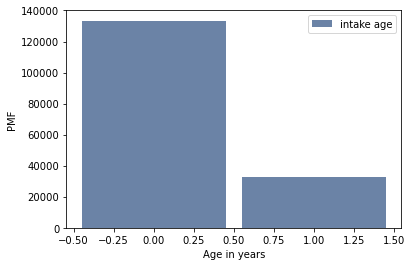

In [217]:
intake_age_hist2 = thinkstats2.Hist(shelter_merged['Intake_Age_Number']>(5), label='intake age')
pmf2 = intake_age_hist2.Copy()
thinkplot.Hist(pmf2)
thinkplot.Config(xlabel='Age in years', ylabel='PMF')

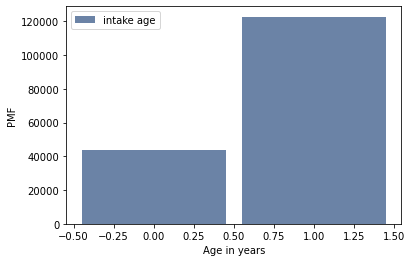

In [218]:
intake_age_hist2 = thinkstats2.Hist(shelter_merged['Intake_Age_Number']<(5), label='intake age')
pmf2 = intake_age_hist2.Copy()
thinkplot.Hist(pmf2)
thinkplot.Config(xlabel='Age in years', ylabel='PMF')

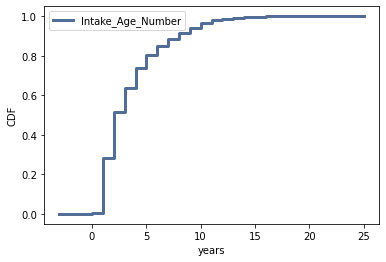

In [223]:
age_cdf = thinkstats2.Cdf(shelter_merged['Intake_Age_Number'], label='Intake_Age_Number')
thinkplot.Cdf(age_cdf)
thinkplot.Config(xlabel='years', ylabel='CDF')

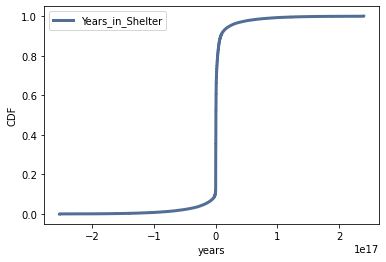

In [231]:
time_cdf = thinkstats2.Cdf(shelter_merged['Calculated_years_in_Shelter'], label='Years_in_Shelter')
thinkplot.Cdf(time_cdf)
thinkplot.Config(xlabel='years', ylabel='CDF')

In [189]:
import statsmodels.formula.api as smf
model = smf.ols('Intake_Age_Number ~ Calculated_years_in_Shelter', data=shelter_merged)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Intake_Age_Number   R-squared:                      -1.444
Model:                            OLS   Adj. R-squared:                 -1.444
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 Jun 2022   Prob (F-statistic):                nan
Time:                        23:59:10   Log-Likelihood:            -4.8870e+05
No. Observations:              166390   AIC:                         9.774e+05
Df Residuals:                  166389   BIC:                         9.774e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.543e-36   1.24e-36      1.246      0.213   -8.84e-37    3.97e-36
Calculated_years_in_Shelter   6.11e-19    4.9e-19      1.246      0.213    -3.5e-19    1.57e-18
==============================================================================
Omnibus:                    44383.548   Durbin-Watson:                   0.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100619.999
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                       5.262   Cond. No.                     2.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
print(shelter_merged.dtypes)

Animal ID                              object
Name_x                                 object
DateTimeIntake                         object
MonthYearIntake                        object
Found Location                         object
Intake Type                            object
Intake Condition                       object
Animal Type_x                          object
Sex upon Intake                        object
Age upon Intake                        object
Breed_x                                object
Color_x                                object
Name_y                                 object
DateTimeOutcome                        object
MonthYearOutcome                       object
Date of Birth                          object
Outcome Type                           object
Outcome Subtype                        object
Animal Type_y                          object
Sex upon Outcome                       object
Age upon Outcome                       object
Breed_y                           